In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=3200, n_features=2, 
                           centers=6, cluster_std=0.5,random_state=101)
# data = make_blobs(n_samples=200, n_features=2, 
#                            centers=4, cluster_std=1.8,random_state=101)

In [4]:
data

(array([[ 0.86159188, -2.85397961],
        [ 4.53102511, -6.12281888],
        [ 4.30924591, -6.32162782],
        ...,
        [ 0.60722052, -2.86233633],
        [-0.1686592 ,  1.51175149],
        [ 3.81226452, -5.17226978]]), array([5, 4, 4, ..., 5, 0, 4]))

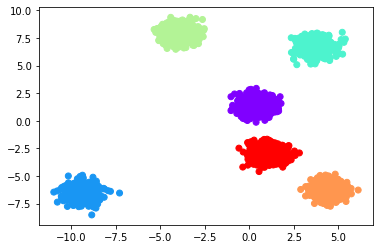

In [5]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [6]:
data[0]

array([[ 0.86159188, -2.85397961],
       [ 4.53102511, -6.12281888],
       [ 4.30924591, -6.32162782],
       ...,
       [ 0.60722052, -2.86233633],
       [-0.1686592 ,  1.51175149],
       [ 3.81226452, -5.17226978]])

In [7]:
data[0].shape

(3200, 2)

In [8]:
data[0][0]

array([ 0.86159188, -2.85397961])

In [9]:
data[1]

array([5, 4, 4, ..., 5, 0, 4])

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=5)

In [12]:
kmeans.fit(data[0])

KMeans(n_clusters=5)

In [13]:
kmeans.predict(np.array([-10,10]).reshape(1,-1))

array([3])

In [14]:
kmeans.cluster_centers_

array([[ 3.72213666,  6.67637302],
       [ 0.71006102, -0.77125694],
       [-9.40503317, -6.54123624],
       [-3.84847315,  7.89148201],
       [ 4.42909862, -6.18101108]])

In [15]:
kmeans.labels_

array([1, 4, 4, ..., 1, 1, 4])

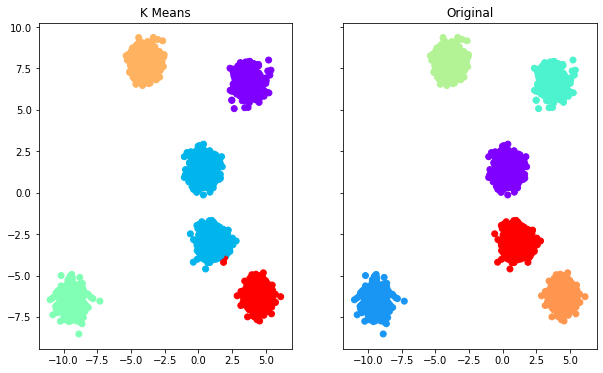

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [17]:
##########################################
#
# try to find k for generated 6 clusters and 3200 samples (All other params are the same)
# 1. loop over k = 2..20
# 2. calculate wss/sse = sigma(point-center)^2 = (x-x_center)^2 + (y-y_center)^2
# 3. draw sse vs k
# 4. choose the elbow k
# 5. which parameter will make choosing k more difficult (when creating the blobs)

In [18]:
sse = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k).fit(data[0])
    cents = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data[0])
    curr_sse = 0
    for i in range(len(data[0])):
        curr_center = cents[pred_clusters[i]]
        curr_sse += (data[0][i,0] - curr_center[0])**2 + (data[0][i,1] - curr_center[1])**2
    print(curr_sse)
    sse.append(curr_sse)
        
    
    
    

89546.2582897918
35581.43158295237
17958.191077637945
6837.691811144548
1666.5420369222422
1570.889009852611
1477.5199931576724
1380.5283066361908
1292.61573098891
1196.6959382397824
1135.11622677716
1045.3918858572458
985.4079728132259
919.6203124592425
861.8192936072975
819.1051859629923
750.5386410938215
717.5414831352621
695.8337105689014


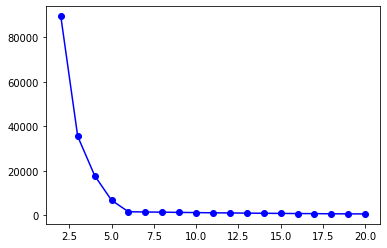

In [19]:
plt.plot(range(2,21), sse, "bo-")

In [20]:
# kmeans.cluster_centers_

In [21]:
#########################
# find best k using silouette score

In [22]:
from sklearn.metrics import silhouette_score

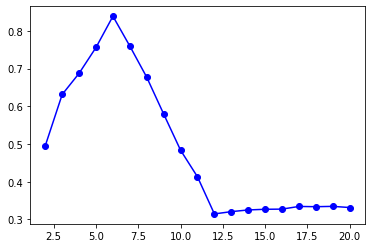

In [23]:
s_scores = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k).fit(data[0])
    cents = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data[0])
    s_score = silhouette_score(data[0], pred_clusters)
#     print(s_score)
    s_scores.append(s_score)
plt.plot(range(2,21), s_scores, "bo-")